# COVID-19 확산 예방을 위한 마스크 착용 감지 소프트웨어 개발

*2020105721 이시온*  
*2020105723 이우일*

## 프로젝트 목표 및 내용

현재 전세계적으로 가장 큰 문제라고 이야기되는 것은 바로 코로나 19 바이러스 입니다. 이러한 바이러스는 전세계에 많은 사람들의 일상을 빼앗아가고, 수많은 피해자들을 낳았으며 현재 우리는 이전과는 다른 세상을 살아가고 있습니다.
이렇게 큰 피해를 준 코로나 19 바이러스를 예방하기에 가장 쉬운 방법은 마스크를 착용하는 것이라고 합니다. 따라서 우리들은 코로나 19 바이러스의 확산을 막고 이 질병이 없었던 시대로 다시 돌아갈 수 있도록 마스크를 착용하고 있는지 여부를 감지하는 소프트웨어를 개발할 계획입니다.
이 주제에 대해 조금 더 자세히 설명하자면, 일단 사람의 얼굴을 인식한 후, 그 사람이 마스크를 착용하고 있는지의 여부에 대해서는 당연히 판단을 할 수 있도록 개발할 예정입니다. 또 이에 추가적으로 마스크를 착용하고 있더라도 코를 가리지 않고 입만 가리고 있는지, 혹은 코와 입 모두 가리지 않고 턱에만 걸치고 있는지를 구별하는 소프트웨어를 개발하고자 합니다.

## 주제 변경 이유

주제를 변경한 이유는 크게 3가지 입니다.

#### ① 이전 주제에서 목표했던 소프트웨어의 분야와 저희가 공통으로 관심있어 하는 분야와의 괴리

#### ② 구현 방법에 대한 어려움

#### ③ 이전에 목표했던 소프트웨어의 실질적 의미가 크지 않다는 것에 대한 회의감


따라서 보다 나은 주제를 찾아보고자 하였고, 공통 관심 분야인 컴퓨터 비전과 관련된 주제를 탐색하게 되었습니다. 또한 저희는 사회적으로 크게 이슈가 되는 분야들에 기여하고 싶다는 생각을 가지고 있었기 때문에 마스크의 착용 여부를 판단해주는 소프트웨어를 개발하는 것으로 주제로 변경하게 되었습니다.

## 구현 방법

마스크 착용 여부를 판단하는 소프트웨어를 개발하기 위한 방법을 두 가지 정도로 생각해보았습니다.
일단 첫번째 방법으로는 dlib을 이용하는 방법입니다. dlib이라는 라이브러리는 얼굴을 탐색하고 인식하는 라이브러리로 이를 이용하면 눈, 코, 입, 눈썹 턱선의 Facial Landmark를 검출할 수 있습니다. 이 점을 활용하여 마스크를 온전히 착용한다면 코와 입, 턱선이 모두 Landmark가 검출되지 않을 것이고, 입과 턱선만 검출되지 않으면 입만 가리도록 마스크를 착용한 경우, 턱선만 검출되지 않으면 턱에만 마스크를 걸친 경우로 판단할 수 있을 것이라고 생각하였습니다.

그래서 이 방법을 간단하게 테스트해본 결과, 처음에 생각했던 결과와 다르게 나타나게 되었습니다.
마스크를 착용하지 않고 Facial Landmark detection을 한 경우 아래와 같이 모든 부분을 잘 인식합니다.

![Facial_Landmark.jpg](Facial_Landmark.jpg)

하지만 마스크를 착용하거나 얼굴의 일부분을 가리면 가려진 부분의 Landmark만 인식을 하지 않은 것이 아니라 얼굴의 모든 부분의 Landmark를 인식하지 않는 모습을 보입니다.

![Facial_Landmark_mask.jpg](Facial_Landmark_mask.jpg)

이렇게 마스크를 착용하면 가린 부분뿐만 아니라 전체의 Facial Landmark를 인식하지 못하기 때문에 첫번째 방법으로는 구현할 수 없다는 것을 깨닫게 되어 다른 방법을 찾아보았습니다.


따라서 목표한 소프트웨어를 개발하기 위해 생각한 두번째 방법으로는 Tensorflow의 keras를 이용하는 방법입니다. keras를 이용하여 컴퓨터를 학습시켜 이미지를 분류해낼 수 있도록 할 계획입니다. 컴퓨터를 학습시키기 위한 데이터셋은 https://github.com/cabani/MaskedFace-Net 이곳에서 제공하고 있는 데이터를 바탕으로 진행할 예정입니다. 이곳에서 제공하는 데이터셋은 마스크를 올바르게 착용한 것과 그렇지 않은 것으로만 분류하고 있기 때문에 이 데이터들을 다시 올바르게 착용한 경우, 입과 턱만 가린 경우, 턱만 가린 경우 그리고 마스크를 아예 착용하지 않은 경우로 다시 분류하여 학습 모델로 사용할 예정입니다.

## 이미지 전처리 및 데이터 분류 

학습 데이터로 사용할 이미지는 다음과 같습니다.

![mask_image.jpg](mask_image.jpg)

위 깃허브 링크에서 제공하는 이미지의 종류는

### 1. 마스크를 제대로 착용한 이미지
### 2. 마스크를 코가 보이도록 착용한 이미지
### 3. 마스크를 코와 입 모두가 보이도록 착용한 이미지
### 4. 마스크를 코와 입만 가리고 턱에 걸치지 않게 착용한 이미지

이렇게 네 가지 종류가 있었습니다. 각각의 파일이름은 N_Mask, N_Mask_Mouth_Chin, N_Mask_Chin,N_Mask_Nose_Mouth 입니다.(N은 6자리 숫자)

그런데 마스크를 아예 착용하지 않은 이미지는 제공하지 않아, 다른 깃허브 링크로부터 마스크를 착용하지 않은 사진들을 받아왔습니다.


이제 마스크 데이터들을 분류할 것입니다. 아래는 데이터셋을 학습데이터와 검증데이터로 각각 나눠주는 코드입니다.

In [66]:
from PIL import Image
import glob, numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



img_dir = 'C:\\Users\\Sion\\Desktop\\1-2 자료\\train(O)' # 이미지들이 모여있는 파일 이름(000000)

# 마스크 여부 카테고리 
categories = ['Mask','Mask_Mouth_Chin','Mask_Chin'] 
img_dir_2 = ['00000','01000','02000','03000']

# 64x64 이미지로 변경
image_w = 64
image_h = 64


images = []
labels = []


for k in img_dir_2:
    img_dir_specf = img_dir + '\\' + k

    for num,categ in enumerate(categories):
        file_path = glob.glob(img_dir_specf+'\\'+'?????_'+categ+'.jpg') # Massk 제대로 낀 것 부터 차례대로 그 위치 나열
    
        for i,f in enumerate(file_path):
            img = Image.open(f)
            img = img.convert("RGB")
            img = img.resize((image_w, image_h)) # 64x64 이미지로 변경
            data = np.asarray(img)
            images.append(data) # numpy형태로 변환한 마스크 사진들
            labels.append(num) # X 사진들의 라벨(0,1,2는 각각 'Mask','Mask_Mouth_Chin','Mask_Chin'를 가리킴)
        
        #진행상황 알려주는 코드
            if i % 100 == 0: 
                print(categ, " : ", f)

        

print('---------------------------------------------------')
images = np.array(images)
labels = np.array(labels)

# X,Y 길이 같은지 점검
print('이미지 갯수 :', len(images))
print('라벨 갯수 :', len(labels))

# training 세트와 test 세트 비율 0.1
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.1,random_state=123)

# 각각의 데이터 갯수 확인
print('이미지 학습 데이터 갯수 :', len(images_train))
print('이미지 검증 데이터 갯수 :', len(images_test))
print('라벨 학습 데이터 갯수 :', len(labels_train))
print('라벨 검증 데이터 갯수 :', len(labels_test))

Mask  :  C:\Users\Sion\Desktop\1-2 자료\train(O)\00000\00000_Mask.jpg
Mask  :  C:\Users\Sion\Desktop\1-2 자료\train(O)\00000\00105_Mask.jpg
Mask  :  C:\Users\Sion\Desktop\1-2 자료\train(O)\00000\00210_Mask.jpg
Mask  :  C:\Users\Sion\Desktop\1-2 자료\train(O)\00000\00311_Mask.jpg
Mask  :  C:\Users\Sion\Desktop\1-2 자료\train(O)\00000\00416_Mask.jpg
Mask  :  C:\Users\Sion\Desktop\1-2 자료\train(O)\00000\00519_Mask.jpg
Mask  :  C:\Users\Sion\Desktop\1-2 자료\train(O)\00000\00626_Mask.jpg
Mask  :  C:\Users\Sion\Desktop\1-2 자료\train(O)\00000\00736_Mask.jpg
Mask  :  C:\Users\Sion\Desktop\1-2 자료\train(O)\00000\00840_Mask.jpg
Mask  :  C:\Users\Sion\Desktop\1-2 자료\train(O)\00000\00949_Mask.jpg
Mask_Mouth_Chin  :  C:\Users\Sion\Desktop\1-2 자료\train(O)\00000\00000_Mask_Mouth_Chin.jpg
Mask_Mouth_Chin  :  C:\Users\Sion\Desktop\1-2 자료\train(O)\00000\00122_Mask_Mouth_Chin.jpg
Mask_Mouth_Chin  :  C:\Users\Sion\Desktop\1-2 자료\train(O)\00000\00249_Mask_Mouth_Chin.jpg
Mask_Mouth_Chin  :  C:\Users\Sion\Desktop\1-2 자료\t

images와 labels의 shape는 다음과 같습니다. 

In [67]:
# 이미지 형태
print(images_train.shape)
print(labels_train.shape)

(4041, 64, 64, 3)
(4041,)


이제 CNN을 이용하기 위해 keras의 Conv2D를 이용할 것이고, 위 데이터들을 학습시킬 것입니다. 먼저 필요한 모듈들을 import 합니다.

In [68]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

그리고 images 파일들의 numpy값들이 0~1 사이의 값이 되도록 255로 나누어줍니다.

In [69]:
images_train = images_train.astype('float32') / 255
images_test = images_test.astype('float32') / 255

이제 전처리가 모두 끝났습니다. 다음의 코드를 통해 CNN을 모델링 합니다.

In [70]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=images_train.shape[1:],activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation="softmax")) # 3개의 클래스 '[Mask','Mask_Mouth_Chin','Mask_Chin'] 중 하나 

model_dir = '.\\model'
model_path = model_dir + '\\'+'mask_detection.model'
checkpoint = ModelCheckpoint(filepath =model_path,monitor='val_loss',verbose=1,save_best_only=True)

# 모델 컴파일 (다중 클래스 분류이므로 loss는 sparse_categorical_crossentropy 사용)
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [71]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 8, 8, 64)         

CNN 과정을 간략히 나타내면 위와 같습니다. 이제 이 모델을 images_train, labels_train에 적용시켜 학습시킬 것입니다. 코드는 아래와 같습니다.

In [72]:
model.fit(images_train, labels_train, batch_size=64, epochs=5, validation_split=0.15)

Epoch 1/5
54/54 [==============================] - 12s 215ms/step - loss: 0.7583 - accuracy: 0.7076 - val_loss: 0.5316 - val_accuracy: 0.7743
Epoch 2/5
54/54 [==============================] - 11s 203ms/step - loss: 0.2205 - accuracy: 0.9153 - val_loss: 0.0733 - val_accuracy: 0.9753
Epoch 3/5
54/54 [==============================] - 11s 201ms/step - loss: 0.1074 - accuracy: 0.9581 - val_loss: 0.0823 - val_accuracy: 0.9654
Epoch 4/5
54/54 [==============================] - 11s 207ms/step - loss: 0.0705 - accuracy: 0.9741 - val_loss: 0.0508 - val_accuracy: 0.9769
Epoch 5/5
54/54 [==============================] - 11s 203ms/step - loss: 0.0570 - accuracy: 0.9808 - val_loss: 0.0326 - val_accuracy: 0.9918


In [73]:
print("accuracy : {}%".format(100*(model.evaluate(images_test, labels_test)[1])))

15/15 [==============================] - 0s 22ms/step - loss: 0.0364 - accuracy: 0.9889
accuracy : 98.88641238212585%


model을 evaluate해본 결과, 약 99%로 굉장히 높은 정확도를 가지는 CNN모델이 완성되었음을 확인할 수 있습니다. 이미지를 전처리해주는 함수를 정의한 후, 정말 정확한 모델인지 임의의 이미지를 predict 해보겠습니다.

In [74]:
def generator(path): # 사용할 사진 전처리 함수
    X=[]
    img = Image.open(path)
    img = img.convert("RGB")
    img = img.resize((64,64))
    data = np.asarray(img)
    X.append(data)
    X = np.array(X)
    X = X.astype('float32')/255
    return X

        

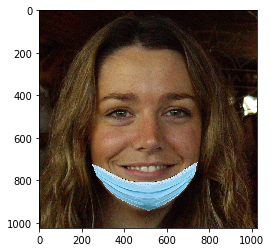

In [87]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

path = 'C:\\Users\\Sion\\Desktop\\1-2 자료\\train(new)\\65.jpg'
img = imread(path) 
 
plt.imshow(img)
plt.show()

실제 categories 리스트는  ['Mask','Mask_Mouth_Chin','Mask_Chin'] 이므로, model을 predict했을 때 3번째 index의 확률 값이 가장 높아야 합니다.

In [89]:
#categories = ['Mask','Mask_Mouth_Chin','Mask_Chin'] 

prediction = model.predict(generator(path))
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
print(prediction)

[[0.0000 0.0302 0.9698]]


3번째 index 값이 96.98% 로, 모델이 성공적으로 구현됨을 확인할 수 있습니다. 해당 모델을 mask_detecting_model로 저장하겠습니다.

In [90]:
model.save('mask_detecting_model')

INFO:tensorflow:Assets written to: mask_detecting_model\assets


## 얼굴 인식 및 모델 적용

Tensorflow의 keras를 이용하여 컴퓨터를 학습시켜 이미지를 분류할 수 있도록 하기 위해, 마스크를 쓴 얼굴의 영역을 추출해내는 것이 필요했습니다. 얼굴의 영역을 추출하기 위해 OpenCV에서 기본적으로 제공하는 Haar-cascade Detection의 방식을 활용해 구현을 해보려고 했습니다. 하지만 위의 dlib과 마찬가지로 마스크로 얼굴의 일부분을 가리게 된다면 얼굴 인식이 정확하지 않고 인식을 하지 못하는 경우가 있었습니다. 

따라서 차선책을 찾아보던 중 Deep Neural Network(DNN)을 이용하여 얼굴을 인식할 수 있다는 것을 알게되었습니다. DNN을 이용하여 얼굴 인식을 구현한 결과, 마스크를 착용하더라도 얼굴의 영역을 명확하게 판단할 수 있었습니다. 얼굴 인식 기능을 완벽히 구현한 후에는 인식된 얼굴과 모델을 비교해보는 과정을 통해 마스크의 착용 여부를 확인할 수 있었습니다.

이제 얼굴 인식을 시작하기에 앞서 아래의 코드는 Python의 코드를 cmd로 실행할 때의 옵션을 설정하도록 하겠습니다. --prototxt는 .deploy.prototxt의 저장된 위치를 가리키고, --model은 얼굴 인식을 위한 모델이 저장된 위치를 가리킵니다. --confidence는 얼굴 인식이 약하게 되는 경우를 필터링 하기 위한 최소 임계값을 설정합니다.

In [1]:
from imutils.video import VideoStream
import numpy as np
import argparse
import imutils
import time
import cv2 as cv
from tensorflow.python.keras.models import load_model

ap = argparse.ArgumentParser()
ap.add_argument("-p", "--prototxt", required=True,
                help="path to Caffe 'deploy' prototxt file")
ap.add_argument("-m", "--model", required=True,
                help="path to Caffe pre-trained model")
ap.add_argument("-c", "--confidence", type=float, default=0.5,
                help="minimum probability to filter weak detections")
args = vars(ap.parse_args())

ModuleNotFoundError: No module named 'imutils'

다음으로 얼굴 인식을 위한 deploy.prototxt 파일과 res10_300x300_ssd_iter_140000.caffemodel 모델을 불러옵니다. 그리고 컴퓨터에 내장되어 있는 카메라를 시작합니다. 또한 위에서 만든 마스크 착용 여부 인식 모델도 불러옵니다.

In [ ]:
# 얼굴 인식 모델 불러오기
print("[INFO] loading model...")
net = cv.dnn.readNetFromCaffe(args["prototxt"], args["model"])

# 카메라 시작
print("[INFO] starting video stream...")
vs = VideoStream(src=0).start()
time.sleep(2.0)

model = load_model("mask_prediction")

data_list = []
loc = []


웹캠에서 프레임별로 사진을 추출한 후에 추출된 사진의 RGB값의 일부를 제외해서 dnn이 분석하기 쉽게 단순화해주었습니다. 그리고 net.setInput을 통해 blob 객체를 네트워크 입력으로 설정하고, net.forward 함수를 사용하여 순방향으로 네트워크를 실행하였습니다.

In [ ]:
# 프레임을 계속 추출
while True:
    # 캠에서 프레임별 사진 추출 후 크기 조정
    frame = vs.read()
    frame = cv.flip(frame, 1)
    frame = imutils.resize(frame, width=400)


    (h, w) = frame.shape[:2]
    blob = cv.dnn.blobFromImage(cv.resize(frame, (300, 300)), 1.0,
                                 (300, 300), (104.0, 177.0, 123.0))


    net.setInput(blob)
    detections = net.forward()



detection[2]라는 값은 얼굴이 인식될 때의 생기는 사각형의 개수를 의미하고, 따라서 인식될 얼굴들에 대해서 confidence = detections[0, 0, i, 2]를 통해 인식된 부분이 얼굴일 확률을 confidence에 저장합니다. 

다음으로 box = detections[0, 0, i, 3:7]의 부분에서는 얼굴로 인식한 부분을 사각형의 상자 안에 담습니다. 그리고 상자의 모든 모서리의 상대 좌표를 얻습니다. 이렇게 얻은 상대 좌표에 np.array([w, h, w, h])의 값을 곱해서 (startX, startY, endX, endY)의 값을 구해냈습니다.

In [ ]:
    for i in range(0, detections.shape[2]):
        # confidence 값 추출
        confidence = detections[0, 0, i, 2]


        # confidence의 최솟값보다 큰 것만 걸러냄
        if confidence < args["confidence"]:
            continue

        # 인식된 물체의 테두리 좌표 계산
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

이제 DNN을 이용하여 얼굴 부분을 추출해냈습니다. 추출한 얼굴 부분을 앞서 모델을 만들때의 방식과 같게 numpy의 형태로 전처리를 해줍니다. 그리고 전처리를 한 것을 리스트에 저장합니다

In [ ]:
        face = frame[startY:endY, startX:endX]
        face = cv.cvtColor(face, cv.COLOR_BGR2RGB)
        face = cv.resize(face, (64, 64))
        face = np.expand_dims(face, axis=0)
        face = np.asarray(face)
        data_list.append(face)
        loc.append((startX, startY, endX, endY))

컴퓨터 내장 카메라로 촬영할 때, 얼굴이 정확하게 인식이 되고 전처리 과정까지 완벽하게 수행된다면, 카메라를 통해 얻어진 이미지와 이미 구현한 모델간의 비교를 진행해야합니다. 모델 간의 비교를 통해 얻어진 수치를 바탕으로 화면에 인식된 정보를 제공해줍니다.

In [ ]:
        if len(data_list) > 0:
            predictions = model.predict(face)
            print(predictions[0])
            print(np.argmax(predictions[0]))
        for box in loc:
            (startX, startY, endX, endY) = box
            if np.argmax(predictions[0]) == 0:
                text = "Mask"
                color = (0,255,0)
            elif np.argmax(predictions[0]) == 1:
                text = "Mask_Mouth_Chin"
                color = (0, 140, 255)
            elif np.argmax(predictions[0]) == 2:
                text = "Mask_Chin"
                color = (0, 0, 255)
            else :
                text = "No Mask"
                color = (255,0,0)

        text = "{}:".format(text)
        cv.rectangle(frame, (startX, startY), (endX, endY),
                      color, 2)
        cv.putText(frame, text, (startX, startY-10),
                    cv.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)

    # 결과 출력
    cv.imshow("Frame", frame)
    k = cv.waitKey(30) & 0xff
    
    # ESC 버튼 누르면 종료
    if k == 27:
        break

얼굴 인식 부분의 코드는 주피터 노트북에서는 실행이 불가능해, Mask_detection.py 파일을 실행해주시기 바랍니다.

마스크를 아예 끼지 않은 dataset을 사용하지 못한 것이 아쉬움에 남는다. 
코스크, 턱스크까지 제공하는 dataset이 하나밖에 없었고, 그 dataset의 마스크는 파란색 마스크이다. 따라서 위에서 정의한 CNN 모델은 파란색 마스크를 쓴 사람만을 class별로 구별할 수 있다.

만약 마스크를 아예 끼지 않은 dataset을 추가한 후 CNN을 모델링 하고 그 모델을 웹캠에 적용시켰을 때, 내가 흰색 마스크를 쓰고 있다면 CNN 모델은 내가 마스크를 끼지 않았다고 판단할 것이다. 실제로 Non_Mask 이미지를 1000여개 추가하고 학습시켜본 결과, 앞서 말한 상황이 그대로 연출되었다. 

따라서, 만약 코스크, 턱스크 이미지를 제공하고  마스크 색이 흰색인 dataset이 존재했다면, 흰색 마스크를 쓴 사람도 잘 구별했을 것이고 마스크를 아예 끼지 않은 사람들까지도 잘 구별했을 것이라는 아쉬움이 남는다. 

## 활동 내역

https://github.com/Mask-recognize-term-project/TermProject